# Домашнее задание № 9. Предобученные трансформеры 

### Задание 1 (8 баллов).
Дообучите 3 предобученных модели на тех же данных, что и в семинаре. Сравните качество и выберите лучшую. 
Модели должны отличаться друг от друга не только параметрами ru/en/multilingual, base/large, cased/uncased. Все три выбранные модели должны работать лучше, чем бейзлайн без дообучения (т.е. если модель не работает, попробуйте другую).




In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 12.7 MB/s 
     |████████████████████████████████| 596 kB 40.8 MB/s 
     |████████████████████████████████| 6.6 MB 41.3 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 880 kB 40.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=6591495629f0034e5b932741ed946d8bcc55d9cb20aa8675464bca8172be500b
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# стандартные библиотеки
import os, re
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from string import punctuation
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline


# tf и huggingface 
import tensorflow as tf
from transformers import TFAutoModel
from transformers import AutoTokenizer

In [ ]:
data = pd.read_csv('lenta_sample.csv')
data.dropna(subset=['topic', 'text'], inplace=True)

In [ ]:
# # # # Мультиязычный берт
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased')
model_bert = TFAutoModel.from_pretrained('bert-base-multilingual-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


### baseline:  

In [ ]:
X = []

for text in data.title:
    ids = tf.constant([tokenizer.encode(text, add_special_tokens=True)])
    output = model_bert(ids, output_attentions=False)
    X.append(tf.math.reduce_mean(output[0], axis=1)[0])

id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}
y = [label2id[label] for label in data.topic.values]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, stratify=y)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print(classification_report(y_val,
                            model.predict(X_val),
                            labels=list(range(len(label2id))),
                            target_names=list(label2id),
                            zero_division=0))

                   precision    recall  f1-score   support

         Ценности       0.00      0.00      0.00         2
       Библиотека       0.00      0.00      0.00         0
   Интернет и СМИ       0.20      0.50      0.29         2
  Наука и техника       0.67      0.67      0.67         3
          Легпром       0.00      0.00      0.00         1
   69-я параллель       0.00      0.00      0.00         1
        Экономика       0.67      1.00      0.80         2
             Крым       0.00      0.00      0.00         0
Силовые структуры       0.33      0.50      0.40         2
         Культура       0.33      0.33      0.33         3
      Бывший СССР       0.50      0.33      0.40         3
           Бизнес       1.00      0.50      0.67         2
              Мир       0.00      0.00      0.00         1
              Дом       0.25      0.50      0.33         2
           Россия       0.00      0.00      0.00         2
            Спорт       1.00      0.50      0.67       

### Дообучение модели "bert-base-multilingual-uncased"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-uncased')
model_bert = TFAutoModel.from_pretrained('bert-base-multilingual-uncased', trainable=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    X.append(ids[:512])
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))),
                                                  test_size=0.05,
                                                  stratify=data.topic,
                                                  random_state=42)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_bert({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.2)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid),
              batch_size=8,
              epochs=20)

Epoch 1/20
72/72 [==============================] - 165s 2s/step - loss: 2.8844 - accuracy: 0.0660 - rec_prec: 0.0000e+00 - val_loss: 2.7357 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
72/72 [==============================] - 142s 2s/step - loss: 2.7853 - accuracy: 0.0833 - rec_prec: 0.0000e+00 - val_loss: 2.7475 - val_accuracy: 0.0968 - val_rec_prec: 0.0323
Epoch 3/20
72/72 [==============================] - 142s 2s/step - loss: 2.7599 - accuracy: 0.0799 - rec_prec: 0.0000e+00 - val_loss: 2.6907 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 4/20
72/72 [==============================] - 142s 2s/step - loss: 2.7527 - accuracy: 0.0903 - rec_prec: 0.0000e+00 - val_loss: 2.6966 - val_accuracy: 0.0968 - val_rec_prec: 0.0323
Epoch 5/20
72/72 [==============================] - 142s 2s/step - loss: 2.7368 - accuracy: 0.1111 - rec_prec: 0.0000e+00 - val_loss: 2.7026 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
72/72 [==============================] - 1

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


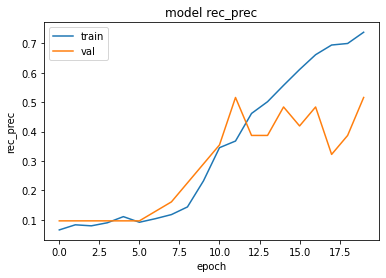

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1),
                            pred,
                            labels=list(range(len(label2id))),
                            target_names=list(label2id),
                            zero_division=0))

                   precision    recall  f1-score   support

        Экономика       1.00      0.50      0.67         2
            Спорт       0.50      1.00      0.67         2
Силовые структуры       0.50      0.50      0.50         2
           Бизнес       0.25      1.00      0.40         2
   69-я параллель       0.00      0.00      0.00         1
         Культура       0.50      0.33      0.40         3
          Легпром       0.00      0.00      0.00         1
              Мир       0.00      0.00      0.00         1
   Интернет и СМИ       0.00      0.00      0.00         2
  Наука и техника       1.00      0.67      0.80         3
         Из жизни       0.33      0.33      0.33         3
      Бывший СССР       0.50      0.67      0.57         3
              Дом       1.00      1.00      1.00         2
         Ценности       1.00      1.00      1.00         2
             Крым       0.00      0.00      0.00         0
           Россия       0.00      0.00      0.00       

Данная модель превосходит бейзлайн и судя по графику наичнает переобучаться.

### Дообучение модели "Geotrend/bert-base-ru-cased"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Geotrend/bert-base-ru-cased")
model_bert = TFAutoModel.from_pretrained("Geotrend/bert-base-ru-cased", trainable=True)

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/659 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/130k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some layers from the model checkpoint at Geotrend/bert-base-ru-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at Geotrend/bert-base-ru-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    X.append(ids[:512])
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))),
                                                  test_size=0.05,
                                                  stratify=data.topic,
                                                  random_state=42)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_bert({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.3)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid),
              batch_size=4,
              epochs=20)

Epoch 1/20
144/144 [==============================] - 87s 539ms/step - loss: 2.9173 - accuracy: 0.0573 - rec_prec: 0.0000e+00 - val_loss: 2.7399 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 2/20
144/144 [==============================] - 74s 516ms/step - loss: 2.8471 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7294 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 3/20
144/144 [==============================] - 74s 516ms/step - loss: 2.8109 - accuracy: 0.0868 - rec_prec: 0.0000e+00 - val_loss: 2.7174 - val_accuracy: 0.1290 - val_rec_prec: 0.0000e+00
Epoch 4/20
144/144 [==============================] - 74s 515ms/step - loss: 2.7981 - accuracy: 0.0712 - rec_prec: 0.0000e+00 - val_loss: 2.7064 - val_accuracy: 0.1290 - val_rec_prec: 0.0000e+00
Epoch 5/20
144/144 [==============================] - 74s 516ms/step - loss: 2.7780 - accuracy: 0.0781 - rec_prec: 0.0000e+00 - val_loss: 2.6924 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
144/144 [=====

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


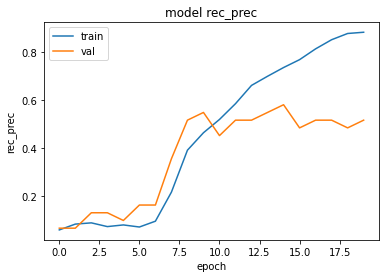

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1),
                            pred,
                            labels=list(range(len(label2id))),
                            target_names=list(label2id),
                            zero_division=0))

                   precision    recall  f1-score   support

         Ценности       1.00      1.00      1.00         2
       Библиотека       0.00      0.00      0.00         0
   Интернет и СМИ       0.00      0.00      0.00         2
  Наука и техника       0.67      0.67      0.67         3
          Легпром       0.00      0.00      0.00         1
   69-я параллель       0.00      0.00      0.00         1
        Экономика       0.67      1.00      0.80         2
             Крым       0.00      0.00      0.00         0
Силовые структуры       0.25      0.50      0.33         2
         Культура       0.67      0.67      0.67         3
      Бывший СССР       0.00      0.00      0.00         3
           Бизнес       0.33      1.00      0.50         2
              Мир       0.00      0.00      0.00         1
              Дом       0.67      1.00      0.80         2
           Россия       0.00      0.00      0.00         2
            Спорт       0.50      0.50      0.50       

Данная модель также превосходит бейзлайн и показывет почти такой же показатель по f1 мере

### Дообучение модели "distilbert-base-multilingual-cased"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")
model_bert = TFAutoModel.from_pretrained("distilbert-base-multilingual-cased", trainable=True)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/869M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    X.append(ids[:512])
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))),
                                                  test_size=0.05,
                                                  stratify=data.topic,
                                                  random_state=42)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_bert({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.3)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid),
              batch_size=8,
              epochs=20)

Epoch 1/20
72/72 [==============================] - 46s 569ms/step - loss: 2.8368 - accuracy: 0.1024 - rec_prec: 0.0000e+00 - val_loss: 2.7146 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
72/72 [==============================] - 39s 538ms/step - loss: 2.7644 - accuracy: 0.0990 - rec_prec: 0.0000e+00 - val_loss: 2.7040 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
72/72 [==============================] - 39s 539ms/step - loss: 2.7596 - accuracy: 0.0851 - rec_prec: 0.0000e+00 - val_loss: 2.6959 - val_accuracy: 0.0323 - val_rec_prec: 0.0000e+00
Epoch 4/20
72/72 [==============================] - 39s 541ms/step - loss: 2.7352 - accuracy: 0.1094 - rec_prec: 0.0017 - val_loss: 2.6949 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 5/20
72/72 [==============================] - 39s 538ms/step - loss: 2.7626 - accuracy: 0.0885 - rec_prec: 0.0000e+00 - val_loss: 2.6927 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
72/72 [=====================

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


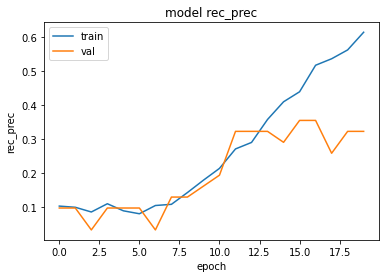

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1),
                            pred,
                            labels=list(range(len(label2id))),
                            target_names=list(label2id),
                            zero_division=0))

                   precision    recall  f1-score   support

         Ценности       1.00      0.50      0.67         2
       Библиотека       0.00      0.00      0.00         0
   Интернет и СМИ       0.33      0.50      0.40         2
  Наука и техника       0.50      0.67      0.57         3
          Легпром       0.00      0.00      0.00         1
   69-я параллель       0.00      0.00      0.00         1
        Экономика       0.50      0.50      0.50         2
             Крым       0.00      0.00      0.00         0
Силовые структуры       1.00      0.50      0.67         2
         Культура       0.00      0.00      0.00         3
      Бывший СССР       0.33      0.67      0.44         3
           Бизнес       0.00      0.00      0.00         2
              Мир       0.00      0.00      0.00         1
              Дом       0.50      1.00      0.67         2
           Россия       0.00      0.00      0.00         2
            Спорт       0.00      0.00      0.00       

distilbert также начинает сильно переобучаться, при этом не достигая минимального показателя в 0.3 по f1 мере, поэтому рассмотрим четвёртую модель

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model_bert = TFAutoModel.from_pretrained('bert-base-multilingual-cased', trainable=True)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
X = []

for text in data.title:
    ids = tokenizer.encode(text)
    X.append(ids[:512])
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))),
                                                  test_size=0.05,
                                                  stratify=data.topic,
                                                  random_state=42)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")

output = model_bert({"input_ids":input_word_ids})
drop = tf.keras.layers.Dropout(0.3)(output[0][:, 0]) 
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(tf.optimizers.Adam(learning_rate=2e-6,
                                    ), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_clf.fit(X_train, y_train, 
              validation_data=(X_valid, y_valid),
              batch_size=4,
              epochs=20)

Epoch 1/20
144/144 [==============================] - 171s 1s/step - loss: 2.8862 - accuracy: 0.0677 - rec_prec: 0.0000e+00 - val_loss: 2.7314 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
144/144 [==============================] - 154s 1s/step - loss: 2.8213 - accuracy: 0.0660 - rec_prec: 0.0000e+00 - val_loss: 2.7119 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
144/144 [==============================] - 153s 1s/step - loss: 2.7638 - accuracy: 0.0938 - rec_prec: 0.0000e+00 - val_loss: 2.7018 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 4/20
144/144 [==============================] - 154s 1s/step - loss: 2.7465 - accuracy: 0.0885 - rec_prec: 0.0000e+00 - val_loss: 2.6812 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 5/20
144/144 [==============================] - 154s 1s/step - loss: 2.7350 - accuracy: 0.0990 - rec_prec: 0.0000e+00 - val_loss: 2.6279 - val_accuracy: 0.1290 - val_rec_prec: 0.0000e+00
Epoch 6/20
144/144 [===============

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


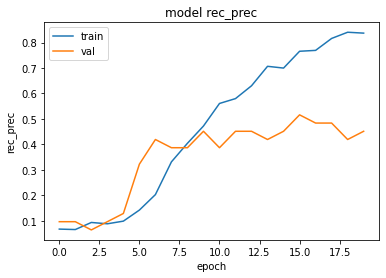

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)
print(classification_report(y_valid.argmax(1),
                            pred,
                            labels=list(range(len(label2id))),
                            target_names=list(label2id),
                            zero_division=0))

                   precision    recall  f1-score   support

        Экономика       0.00      0.00      0.00         2
            Спорт       0.50      0.50      0.50         2
Силовые структуры       0.50      0.50      0.50         2
           Бизнес       0.25      1.00      0.40         2
   69-я параллель       0.00      0.00      0.00         1
         Культура       1.00      0.67      0.80         3
          Легпром       0.00      0.00      0.00         1
              Мир       0.00      0.00      0.00         1
   Интернет и СМИ       0.00      0.00      0.00         2
  Наука и техника       1.00      0.33      0.50         3
         Из жизни       0.60      1.00      0.75         3
      Бывший СССР       0.50      0.33      0.40         3
              Дом       1.00      1.00      1.00         2
         Ценности       1.00      0.50      0.67         2
             Крым       0.00      0.00      0.00         0
           Россия       0.00      0.00      0.00       

Данная модель  также показывает хороший результат и при этом быстрее выходит на "плато" по val_accuracy.

При сравнении всех моделей f1-score weighted avg лучшие значения у модели bert-base-multilingual-uncased. 

### Задание  2 (2 балла)

Ответьте на следующие вопросы (напишите хотя бы по несколько предложений):

1) Чем ROBERTA отличается от BERT? В какой статье описана ROBERTA?

2) Чем модель T5 отличается от ROBERTA/BERT? 

1) RoBERTa описана в Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., ... & Stoyanov, V. (2019). RoBERTa: A robustly optimized bert pretraining approach.
Ключевые отличия этой модели от BERT:
- Динамическое маскирование: BERT использует статическое маскирование (одна и та же часть предложения маскируется в каждую эпоху), а RoBERTa использует динамическое маскирование (для разных эпох маскируются разные части предложений)
- Исключение задачи NSP (Next Sentence Prediction): было замечено, что задача NSP не очень эффективна для предобучения модели BERT. Поэтому в RoBERTa используется только задача MLM (Masked Language Model).
- Больше данных: BERT предобучен на "Toronto BookCorpus" и "English Wikipedia datasets", а RoBERTa, помимо этих двух наборов данных, была обучена и на других данных (CC-News, Open WebText и др.)
- Большой размер батча: batch size BERT - 256 с 1 миллионом шагов, а у RoBERTa - 8 000 с 300 000 шагами, что делает RoBERTa более производительной и более быстрой по сравнению с BERT.

Таким образом, RoBERTa получше BERT.

2) Есть несколько ключевых отличий:
- В BERT есть только энкодер, а в T5 - энкодер и декодер
- T5 не выдает метку класса или фрагмент инпута, а выдает текст (из этого следует, что одна и та же модель T5 может быть использована для любой задачи NLP без каких-либо изменений в архитектуре, в отличие от BERT)